In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
img_size=256
BATCH_SIZE=32
print("start downloading")
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size=BATCH_SIZE
)
print("finished")

start downloading
Found 2152 files belonging to 3 classes.
finished


In [3]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
epochs=5
train_ds=dataset.take(54)
len(train_ds)

54

In [5]:
test_ds=dataset.skip(54)
val_ds=test_ds.take(6)
len(val_ds)
test_ds=test_ds.skip(6)
len(test_ds)

8

In [6]:
len(val_ds)

6

In [7]:
def get_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds


In [8]:
train_ds,val_ds,test_ds=get_partitions(dataset)
len(train_ds)

54

In [9]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(img_size,img_size),
    layers.Rescaling(1.0/255)
])

In [10]:
data_augmentation=tf.keras.Sequential([
    
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [11]:
channels=3
input_shape=(BATCH_SIZE,img_size,img_size,channels)
n_classes=3
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
    
])
model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
model.fit(
    train_ds,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5


54/54 [==============================] - 181s 3s/step - loss: 0.8452 - accuracy: 0.5863 - val_loss: 0.5531 - val_accuracy: 0.7708
Epoch 2/5
54/54 [==============================] - 157s 3s/step - loss: 0.5051 - accuracy: 0.7617 - val_loss: 0.3054 - val_accuracy: 0.8571
Epoch 3/5
54/54 [==============================] - 125s 2s/step - loss: 0.3662 - accuracy: 0.8536 - val_loss: 0.3247 - val_accuracy: 0.8542
Epoch 4/5
54/54 [==============================] - 103s 2s/step - loss: 0.2981 - accuracy: 0.8756 - val_loss: 0.2270 - val_accuracy: 0.9167
Epoch 5/5
54/54 [==============================] - 95s 2s/step - loss: 0.2360 - accuracy: 0.9049 - val_loss: 0.2545 - val_accuracy: 0.8906


In [15]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 [==============================] - 0s 59ms/step


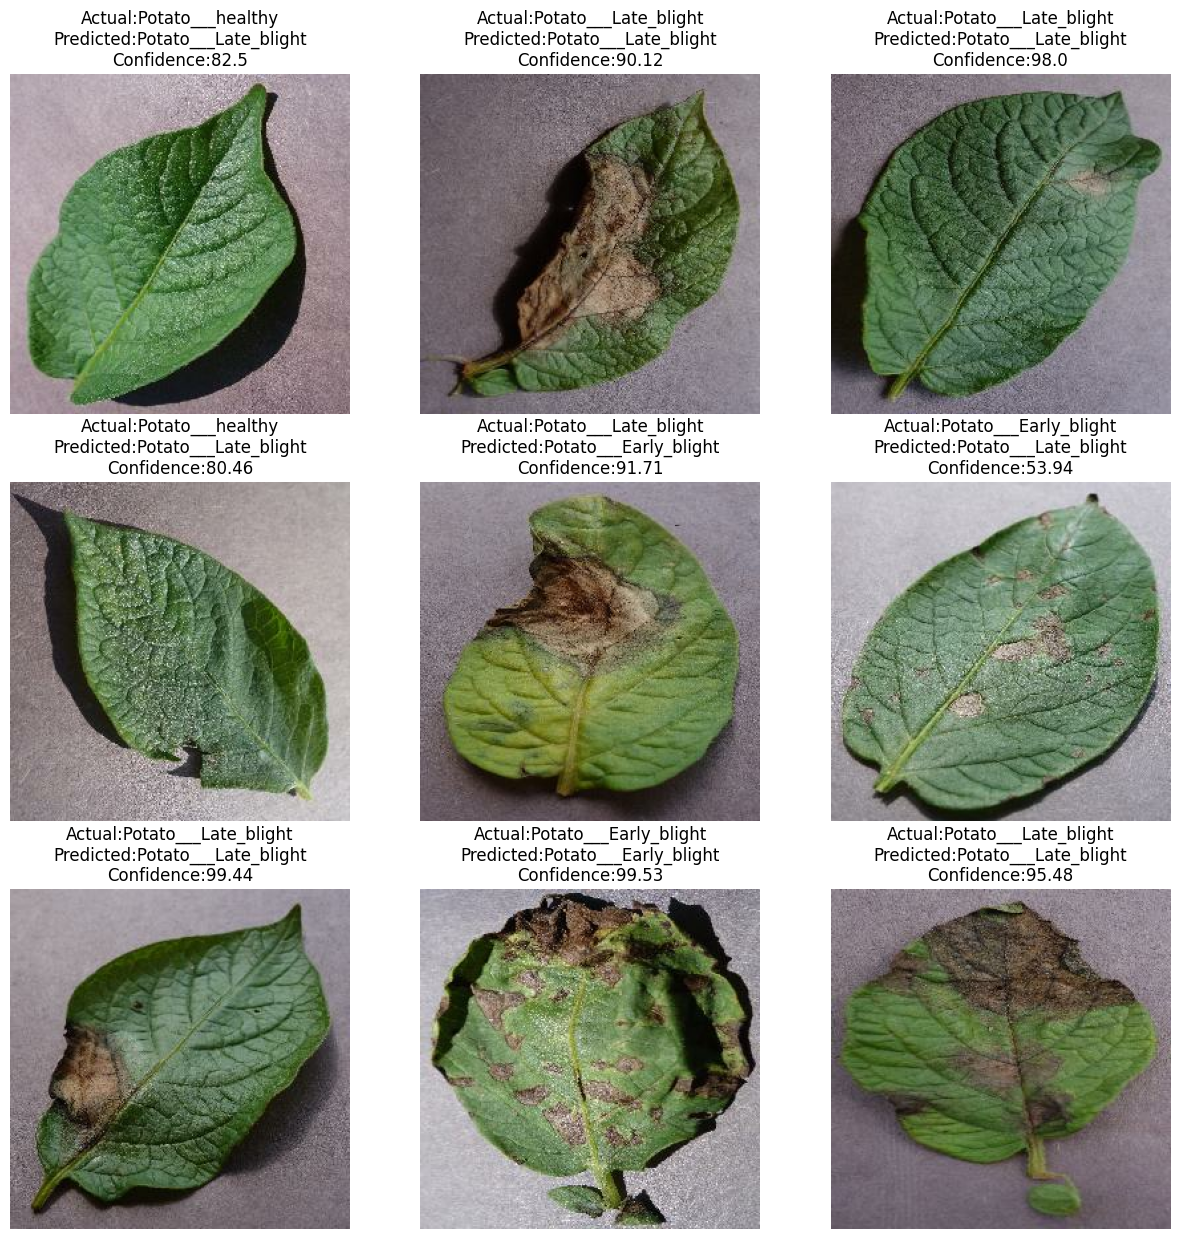

In [16]:
plt.figure(figsize=(15,15))
import numpy as np
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class}\nPredicted:{predicted_class}\nConfidence:{confidence}")
        plt.axis("off")

In [20]:
# SAFE & RECOMMENDED SAVE
model.save("model_version1.keras")


In [21]:
import keras

test_model = keras.saving.load_model("model_version1.keras")
test_model.summary()

print("✅ Model saved and loaded successfully")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [1]:
import keras

model = keras.saving.load_model("model_v1.keras")
model.save("models/potato_model/1")

print("SavedModel created successfully")






INFO:tensorflow:Assets written to: models/potato_model/1\assets


INFO:tensorflow:Assets written to: models/potato_model/1\assets


SavedModel created successfully


In [2]:
import os
os.getcwd()



'C:\\Users\\kumar\\Downloads\\potato_desease\\training'

In [5]:
import keras
import os

MODEL_KERAS_PATH = r"C:\Users\kumar\Downloads\potato_desease\saved_models\1\model_version1.keras"
TF_SERVING_PATH = r"C:\Users\kumar\Downloads\potato_desease\models\potato_model\1"

# Ensure folder exists
os.makedirs(TF_SERVING_PATH, exist_ok=True)

# Load .keras model
model = keras.saving.load_model(MODEL_KERAS_PATH)

# Save in TF Serving format
model.save(TF_SERVING_PATH)

print("SavedModel written to:", TF_SERVING_PATH)


INFO:tensorflow:Assets written to: C:\Users\kumar\Downloads\potato_desease\models\potato_model\1\assets


INFO:tensorflow:Assets written to: C:\Users\kumar\Downloads\potato_desease\models\potato_model\1\assets


SavedModel written to: C:\Users\kumar\Downloads\potato_desease\models\potato_model\1
